In [1]:
# import packages
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in data
metadata = pd.read_csv("./metadataCleaned.csv")
counts = pd.read_csv('raw_data/GSE196793_htseq_counts.txt', sep="\t", index_col="ensembl_gene_id")

# check
print("Counts df description:")
print(counts.shape)
print('\n')
print("Metadata df description:")
print(metadata.shape)

Counts df description:
(58306, 84)


Metadata df description:
(84, 4)


In [3]:
counts.head(5)

,0029-0,0029-3,0029-7,0104-0,0104-3,0104-7,0107-0,0107-3,0107-7,0147-0,...,4149-7,4153-0,4153-3,4153-7,4162-0,4162-3,4162-7,4163-0,4163-3,4163-7
ensembl_gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000005,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000000419,228,161,149,324,307,743,267,191,260,168,...,316,612,190,176,314,191,262,300,306,328
ENSG00000000457,1041,813,764,1339,1205,1602,920,826,732,1066,...,979,1662,316,902,1069,872,776,1191,1165,1206
ENSG00000000460,225,221,244,279,340,362,283,264,186,402,...,316,360,100,283,306,221,284,496,427,457
ENSG00000000938,12887,8835,13246,9092,6756,10402,7604,13183,9048,11088,...,8826,15984,2884,14749,9690,12917,8965,13556,17525,12048


In [4]:
# Transpose the data
counts = counts.T
counts.head()

ensembl_gene_id,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000284744,ENSG00000284745,ENSG00000284746,ENSG00000284747,ENSG00000284748,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique
0029-0,0,228,1041,225,12887,90,411,1021,1292,113,...,0,0,0,27,0,21131798,7745618,3244045,4124191,35510287
0029-3,0,161,813,221,8835,69,338,755,1014,54,...,0,0,0,33,4,19454605,4571573,2576221,2147319,18268270
0029-7,0,149,764,244,13246,73,358,838,1066,42,...,0,0,0,43,0,21277339,6939563,3740763,5396604,32927814
0104-0,0,324,1339,279,9092,119,394,839,1794,96,...,0,0,0,24,1,29736883,4053624,2304023,1973925,16275319
0104-3,0,307,1205,340,6756,100,426,1576,1862,93,...,0,0,0,11,0,29108971,6121120,3368107,3381592,25894061


In [6]:
# Reset the index and rename the ensemble gene id column to sampleid
counts.reset_index(inplace=True)
counts.rename_axis(None, axis=1, inplace=True)
counts.rename(columns={'index': 'SampleID'}, inplace=True)

In [7]:
counts.head()

,SampleID,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000284739,ENSG00000284740,ENSG00000284741,ENSG00000284742,ENSG00000284743,ENSG00000284744,ENSG00000284745,ENSG00000284746,ENSG00000284747,ENSG00000284748
0,0029-0,0,228,1041,225,12887,90,411,1021,1292,...,0,1,0,0,0,0,0,0,27,0
1,0029-3,0,161,813,221,8835,69,338,755,1014,...,0,0,0,0,0,0,0,0,33,4
2,0029-7,0,149,764,244,13246,73,358,838,1066,...,0,0,0,0,0,0,0,0,43,0
3,0104-0,0,324,1339,279,9092,119,394,839,1794,...,0,1,0,0,0,0,0,0,24,1
4,0104-3,0,307,1205,340,6756,100,426,1576,1862,...,1,0,0,0,0,0,0,0,11,0


In [8]:
metadata.head()

,SampleID,SampleTiming,FrailtyStatus,Age
0,1125-0,pre-vaccination,non-frail,68.5
1,4115-0,pre-vaccination,frail,88.1
2,4053-0,pre-vaccination,frail,70.6
3,1135-0,pre-vaccination,non-frail,66.6
4,4025-0,pre-vaccination,frail,82.9


In [9]:
# Merge the metadata on the SampleID
merged_df = counts.merge(metadata, on='SampleID')


In [10]:
# Split the merged df into genes and metadata
features = merged_df.drop(columns=['SampleID', 'SampleTiming', 'FrailtyStatus',	'Age'])
Y = merged_df[['SampleID', 'SampleTiming', 'FrailtyStatus',	'Age']]

In [11]:
# begin preprocessing the counts data
# scale the data so that the mean is 0 and the std is 1
scaled_data = preprocessing.scale(features)

# Call the PCA method to an object and fit the data
pca = PCA(n_components=4)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Calculate the percentage variation that each pc accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

Text(0.5, 1.0, 'Scree Plot')

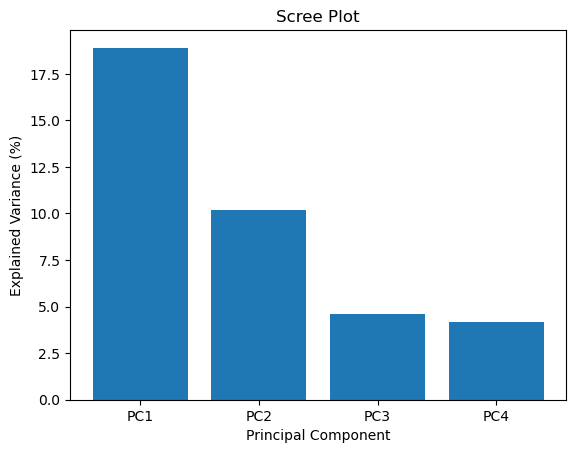

In [12]:
# Create labels for the scree plot
labels = ['PC1', 'PC2', 'PC3', 'PC4']

# Generate Scree plot
plt.bar(x = [1, 2, 3, 4], height=per_var, tick_label=['PC1', 'PC2', 'PC3', 'PC4'])
plt.ylabel('Explained Variance (%)')
plt.xlabel("Principal Component")
plt.title("Scree Plot")

In [13]:
# Create df for biplot
pca_df_scaled = pd.DataFrame(pca_data, columns=labels)

In [14]:
# merge the metadata back in
pca_df_scaled = pca_df_scaled.merge(Y, left_index=True, right_index=True)
pca_df_scaled.head()

,PC1,PC2,PC3,PC4,SampleID,SampleTiming,FrailtyStatus,Age
0,-1.081423,-18.963424,46.017445,10.927654,0029-0,pre-vaccination,frail,73.6
1,-93.626987,-36.387220,2.536758,-0.348388,0029-3,3 days post-vaccination,frail,73.6
2,-44.041329,-23.958177,60.054875,8.786491,0029-7,7 days post-vaccination,frail,73.6
3,10.672143,-17.209651,-39.254190,-2.193016,0104-0,pre-vaccination,non-frail,62.2
4,16.808784,-16.552248,-55.965192,-3.922365,0104-3,3 days post-vaccination,non-frail,62.2


In [15]:
# use matplotlib scatter plot to generate biplot
plt.scatter(pca_df_scaled.PC1, pca_df_scaled.PC2, c=pca_df_scaled[])
plt.title('PCA Biplot')
plt.xlabel(f'PC1 - {per_var[0]}%')
plt.ylabel(f'PC2 - {per_var[1]}%')

SyntaxError: invalid syntax (3096272468.py, line 2)

In [ ]:
# Need to be able to categorize the points
pca_df_scaled.head()

,PC1,PC2,PC3,PC4
0,-1.088136,-18.968403,46.002597,10.943414
1,-93.624404,-36.377055,2.537252,-0.349791
2,-44.040648,-23.959981,60.046259,8.797406
3,10.676611,-17.201517,-39.245757,-2.197007
4,16.815661,-16.549946,-55.952909,-3.918600
